In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [2]:
DATADIR = "D:\MSCS\Research\image processing\keras-tutorial\dataset"
CATEGORIES = ["cats", "dogs", "panda"]

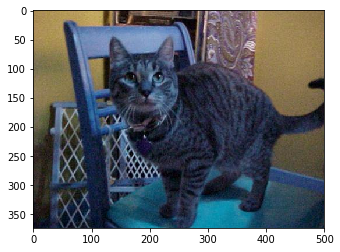

In [3]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path, img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
    break  #...and one more!

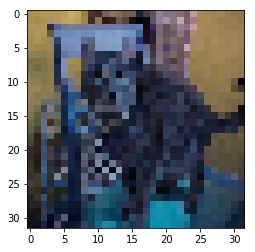

In [4]:
IMG_SIZE = 32
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
from tqdm import tqdm
training_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
        path = os.path.join(DATADIR, category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path, img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
        

In [6]:
create_training_data()

100%|██████████████████████████████████████| 1000/1000 [00:11<00:00, 88.62it/s]


In [7]:
import random
random.shuffle(training_data)

data = []
labels = []

for features, label in training_data:
    data.append(features.flatten())
    labels.append(label)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [8]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [9]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [10]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [11]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 80
# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy
# for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [12]:
print(data.shape)
print(trainX.shape)


(3000, 3072)
(2250, 3072)


In [13]:
H = model.fit(x=trainX, y=trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)

Epoch 1/80
71/71 [==============================] - 6s 64ms/step - loss: 1.1069 - accuracy: 0.3470 - val_loss: 1.1040 - val_accuracy: 0.3187
Epoch 2/80
71/71 [==============================] - 4s 50ms/step - loss: 1.0832 - accuracy: 0.3832 - val_loss: 1.0665 - val_accuracy: 0.4200
Epoch 3/80
71/71 [==============================] - 3s 46ms/step - loss: 1.0673 - accuracy: 0.4301 - val_loss: 1.1307 - val_accuracy: 0.3187
Epoch 4/80
71/71 [==============================] - 3s 40ms/step - loss: 1.0578 - accuracy: 0.4259 - val_loss: 1.1127 - val_accuracy: 0.3187
Epoch 5/80
71/71 [==============================] - 3s 39ms/step - loss: 1.0456 - accuracy: 0.4750 - val_loss: 1.0224 - val_accuracy: 0.5027
Epoch 6/80
71/71 [==============================] - 3s 39ms/step - loss: 1.0225 - accuracy: 0.4910 - val_loss: 0.9951 - val_accuracy: 0.5107
Epoch 7/80
71/71 [==============================] - 4s 57ms/step - loss: 1.0114 - accuracy: 0.4845 - val_loss: 1.0449 - val_accuracy: 0.4920
Epoch 8/80
71

Epoch 59/80
71/71 [==============================] - 3s 40ms/step - loss: 0.7928 - accuracy: 0.5955 - val_loss: 0.8975 - val_accuracy: 0.5400
Epoch 60/80
71/71 [==============================] - 3s 40ms/step - loss: 0.7975 - accuracy: 0.6059 - val_loss: 0.8229 - val_accuracy: 0.5747
Epoch 61/80
71/71 [==============================] - 3s 42ms/step - loss: 0.8020 - accuracy: 0.5898 - val_loss: 0.8201 - val_accuracy: 0.6013
Epoch 62/80
71/71 [==============================] - 3s 42ms/step - loss: 0.7983 - accuracy: 0.6012 - val_loss: 0.8272 - val_accuracy: 0.5760
Epoch 63/80
71/71 [==============================] - 3s 41ms/step - loss: 0.7927 - accuracy: 0.6095 - val_loss: 0.8317 - val_accuracy: 0.5760
Epoch 64/80
71/71 [==============================] - 3s 42ms/step - loss: 0.7924 - accuracy: 0.5983 - val_loss: 0.8185 - val_accuracy: 0.5907
Epoch 65/80
71/71 [==============================] - 3s 42ms/step - loss: 0.7782 - accuracy: 0.6114 - val_loss: 0.8190 - val_accuracy: 0.5773
Epoch 

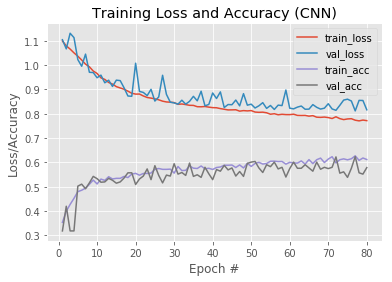

In [14]:
N = np.arange(1, EPOCHS+1)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [15]:
model.save("D:\MSCS\Research\image processing\keras-tutorial\simpleCNN", save_format="h5")

In [26]:
import cv2
import numpy as np
import tensorflow as tf

CATEGORIES = ['cats', 'dogs', 'panda']

def prepare(filepath):
    IMG_SIZE = 32
    img_array = cv2.imread(filepath)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    img_array = img_array.flatten()
    print(img_array.shape)
    img_array = np.array(img_array, dtype="float") / 255.0
    return img_array

In [37]:
img=cv2.imread('D:\MSCS\Research\image processing\keras-tutorial\images\dog.jpg')
img = cv2.resize(img, (32,32))
img = img.flatten()
print(img.shape)
prediction = model.predict((img))
# print(CATEGORIES[int(prediction[0][0])])

(3072,)


ValueError: in user code:

    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 3072 but received input with shape (32, 1)
